In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp


In [24]:
mp.rcParams['xtick.labelsize'] = 14
mp.rcParams['ytick.labelsize'] = 14

# Load Data from Green Mountain West Trail

In [3]:
route = 'mount-lafayette-and-franconia-ridge-trail-loop'
datadir = '../data/'+route+'/'
datafile = datadir + route+'.csv'
metafile = datadir + route+'_metadata.csv'

data = pd.read_csv(datafile)
meta = pd.read_csv(metafile)

print("Title: "+meta['Title'][0])
print("Distance: "+str(meta['Distance (mi)'][0]) + ' miles')
print("Elevation Gain: "+str(meta['Elevation Gain (ft)'][0])+" feet")
print("URL: https://www.alltrails.com/trail/us/new-hampshire/mount-lafayette-and-franconia-ridge-trail-loop")

Title: Mount Lafayette and Franconia Ridge Trail Loop - New Hampshire
Distance: 8.6 miles
Elevation Gain: 3822.0 feet
URL: https://www.alltrails.com/trail/us/new-hampshire/mount-lafayette-and-franconia-ridge-trail-loop


# Clean Data
Users can upload routes that do not exactly match the route described on the main page. This leads to outliers in the data. To filter out these outliers, I require that the recorded distance for each user activity is within 10% of the total distance on the route.

Found 2024 clean rows out of 3284


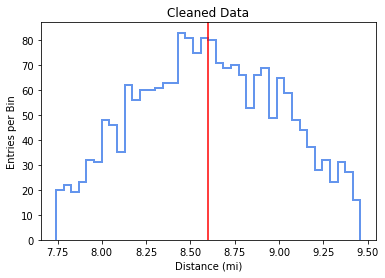

In [14]:
distances = np.array(data['Distance (mi)'])
distance_ref = np.array(meta['Distance (mi)'])[0]
times = np.array(data['Total Time (s)'])
clean = np.logical_and(np.absolute(distances-distance_ref)/distance_ref < 0.1, (times>0.)*(times<24*3600.)) # require distance within 10% of quoted reference

print("Found "+str(np.count_nonzero(clean))+" clean rows out of "+str(len(clean)))

color = 'cornflowerblue'
plt.figure()
plt.hist(distances[clean], color=color, histtype='step', lw=2, bins=40)
plt.axvline(distance_ref, color='red')
plt.title("Cleaned Data")
plt.xlabel('Distance (mi)')
plt.ylabel('Entries per Bin')
plt.show()

# Plot Distribution of Times

## Total Elapsed Time

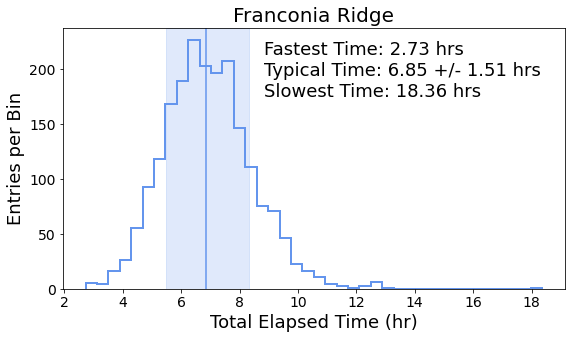

In [47]:
total = np.array(data['Total Time (s)'])/(60.*60.) # in hours

tlower, tmedian, tupper = np.percentile(total[clean], [16, 50, 84])

msg1 = "Fastest Time: "+str(round(np.amin(total[clean]), 2))+" hrs"
msg2 = "Typical Time: "+str(round(tmedian, 2))+" +/- "+str(round(np.std(total[clean]),2))+ " hrs"
msg3 = "Slowest Time: "+str(round(np.amax(total[clean]), 2))+" hrs"

color = 'cornflowerblue'
plt.figure(figsize=[9.0,4.8])
plt.hist(total[clean], bins=40, color=color, lw=2, histtype='step', label='Total Time')
plt.axvline(tmedian, color=color)
plt.axvspan(tlower, tupper, color=color, alpha=0.2)
plt.xlabel('Total Elapsed Time (hr)', fontsize=18)
plt.ylabel('Entries per Bin', fontsize=18)
plt.title('Franconia Ridge', fontsize=20)
ax = plt.gca()
ax.text(0.4 ,0.95, msg1 + '\n'+msg2+'\n'+msg3, transform=ax.transAxes, fontsize=18, horizontalalignment='left', verticalalignment='top')
plt.show()

## Moving Time

Fastest Time: 1.58 hrs
Typical Time: 5.5 +/- 1.17 hrs
Slowest Time: 10.0 hrs


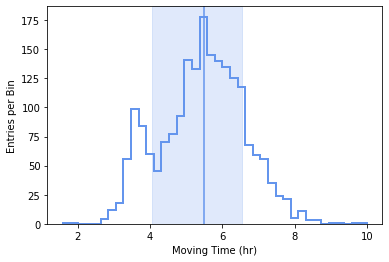

In [16]:
moving = np.array(data['Moving Time (s)'])/(60.*60.) # in hours

tlower, tmedian, tupper = np.percentile(moving[clean], [16, 50, 84])

print("Fastest Time: "+str(round(np.amin(moving[clean]), 2))+" hrs")
print("Typical Time: "+str(round(tmedian, 2))+" +/- "+str(round(np.std(moving[clean]),2))+ " hrs")
print("Slowest Time: "+str(round(np.amax(moving[clean]), 2))+" hrs")

color = 'cornflowerblue'
plt.figure()
plt.hist(moving[clean], bins=40, color=color, lw=2, histtype='step', label='Total Time')
plt.axvline(tmedian, color=color)
plt.axvspan(tlower, tupper, color=color, alpha=0.2)
plt.xlabel('Moving Time (hr)')
plt.ylabel('Entries per Bin')
plt.show()